In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
tiempo_lim = 30 
tiempo = []   
presas = []  
depred = [] 
pp = 50 
dd = 100

In [42]:
c1 = 1
c2 = .005
c3 = .6
currTime = 0 
t0 = 0

In [43]:
#Aquí definimos el proceso A:
while (currTime < tiempo_lim):
    if ((pp > 0) & (dd > 0)): 
        rate1 = c1 * pp
        rate2 = c2 * pp * dd
        rate3 = c3 * dd
        rate = rate1 + rate2 + rate3
        p1 = rate1/rate
        p2 = rate2/rate
        p3 = rate3/rate
        t = np.random.exponential(1/rate)
        w = np.random.multinomial(1,[p1,p2,p3])

        if w[1] == 1: 
            pp -= 1
            dd += 1
            presas.append(pp)
            depred.append(dd)

        if w[0] == 1:     
            pp += 1
            presas.append(pp)
            depred.append(dd)
            
        if (w[2] == 1):   
            dd -= 1
            presas.append(pp)
            depred.append(dd)

    currTime += t
    tiempo.append(currTime)

    #Aquí definimos el proceso B:
    if ((pp > 0) & (dd == 0)):  
        rate = c1 * pp
        t = np.random.exponential(1/rate)
        pp += 1
        presas.append(pp)
        depred.append(dd)
        currTime += t
        tiempo.append(currTime)

#Aquí definimos el proceso C:
    if ((dd  > 0) & (pp == 0)): 
        rate = c3 * dd
        t = np.random.exponential(1/rate)
        dd -= 1
        presas.append(pp)
        depred.append(dd)
        currTime += t
        tiempo.append(currTime)

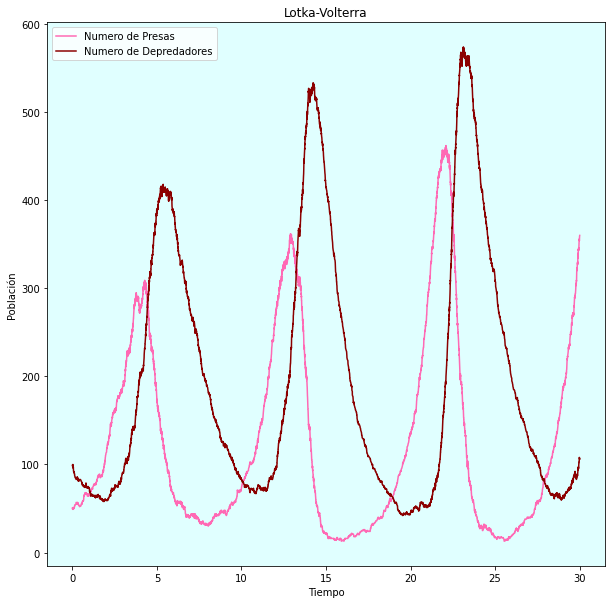

<Figure size 432x288 with 0 Axes>

In [60]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(tiempo, presas, label = "Numero de Presas", color ="Hotpink")
ax.plot(tiempo, depred, color = "Darkred", label = "Numero de Depredadores")
ax.set_facecolor("lightcyan")
ax.set_title("Lotka-Volterra")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Población")
ax.legend(loc = "upper left")
plt.show()

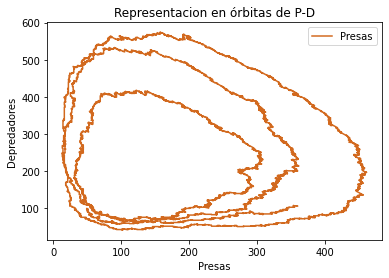

In [62]:
plt.plot(presas, depred,  label = "Presas", color = "Chocolate")
ax.set_facecolor("Coral")
plt.title("Representacion en órbitas de P-D")
plt.xlabel("Presas")
plt.ylabel("Depredadores")
plt.legend(loc="upper right")
plt.show()